1. Importaciones necesarias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

2. Importación de datos

In [2]:
artists_billboard = pd.read_csv('artists_billboard_fix3.csv', encoding = "ISO-8859-1") 
artists_billboard

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
630,630,The Blower's Daughter,MATT McANDREW,Romantic,Medium Tempo,Pop,Male,20141220,881.0,0,1990.0
631,631,First Love,JENNIFER LOPEZ,Peaceful,Slow Tempo,Pop,Female,20140705,238.0,0,1970.0
632,632,No One,ALICIA KEYS,Sophisticated,Slow Tempo,Urban,Female,20071201,157.0,1,1981.0
633,633,She Came To Give It To You,USHER featuring NICKI MINAJ,Energizing,Medium Tempo,Urban,Mixed,20140913,209.0,0,1982.0


In [3]:
artists_billboard.shape

(635, 11)

In [4]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


3. Cuántos fueron Top 1?

In [5]:
artists_billboard.groupby('top').size()

top
0    494
1    141
dtype: int64

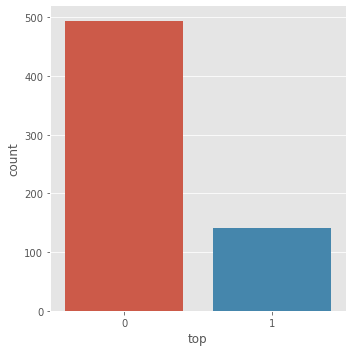

In [6]:
sb.catplot(x='top',data=artists_billboard,kind="count")

4. Cuántos Top 1 son hombres?

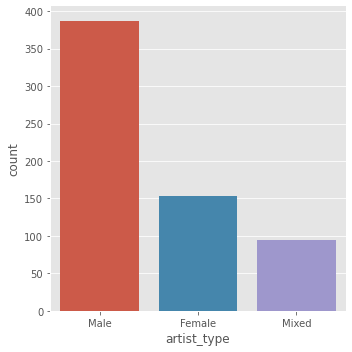

In [7]:
sb.catplot(x='artist_type',data=artists_billboard,kind="count")

4. Clima de las canciones

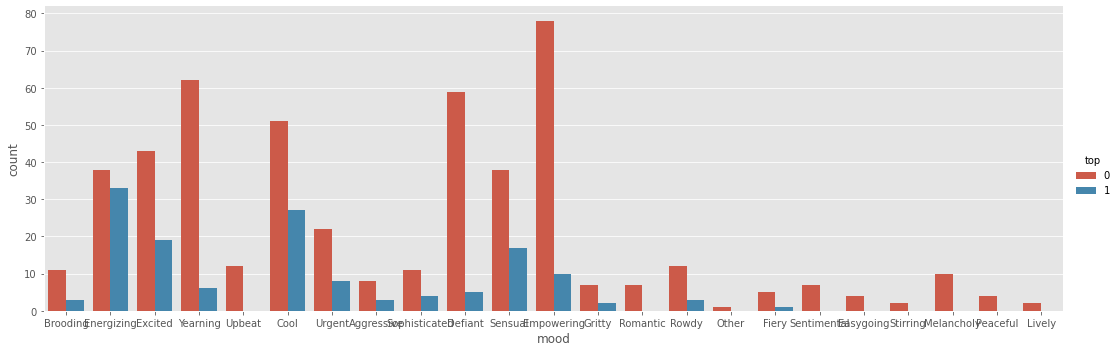

In [8]:
sb.catplot(x='mood',data=artists_billboard,kind="count",hue='top', aspect=3)

5. Tempo de las canciones

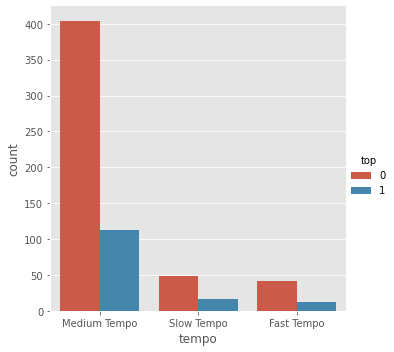

In [9]:
sb.catplot(x='tempo',data=artists_billboard,hue='top',kind="count")

6. Género de las canciones

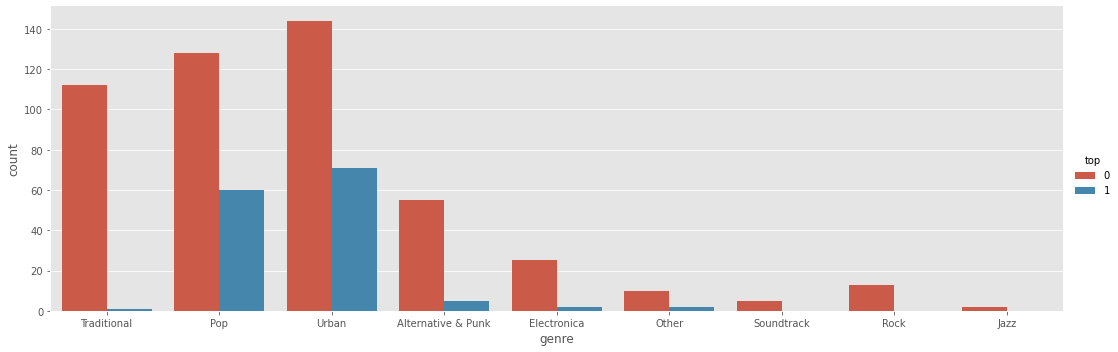

In [10]:
sb.catplot(x='genre',data=artists_billboard,hue='top',kind="count", aspect=3)

7. Año de nacimiento de los artistas 

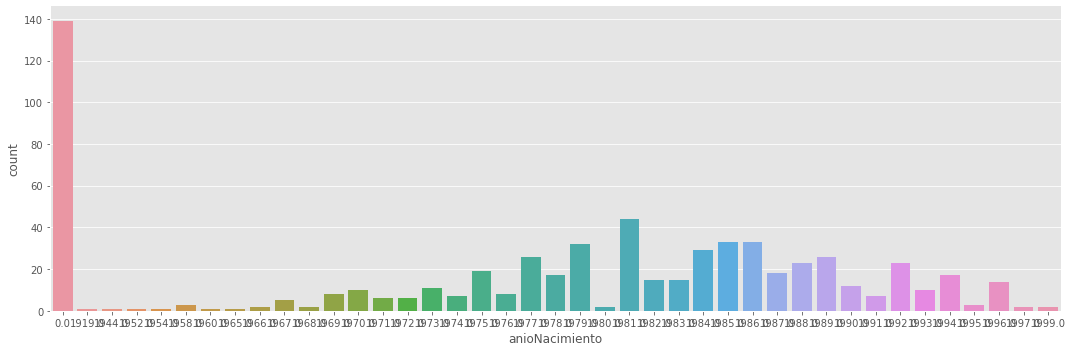

In [11]:
sb.catplot(x='anioNacimiento',data=artists_billboard,kind="count", aspect=3)

El listado se conformó con Tops de 2004 a 2013, y canciones Top y no Top de 2014 a 2015

In [12]:
f1 = artists_billboard['chart_date'].values
f2 = artists_billboard['durationSeg'].values

In [13]:
colores=['orange','blue'] # si no estaban declarados previamente
tamanios=(60,40) # si no estaban declarados previamente

In [14]:
asignar=[]
asignar2=[]
for index, row in artists_billboard.iterrows():    
    asignar.append(colores[row['top']])
    asignar2.append(tamanios[row['top']])

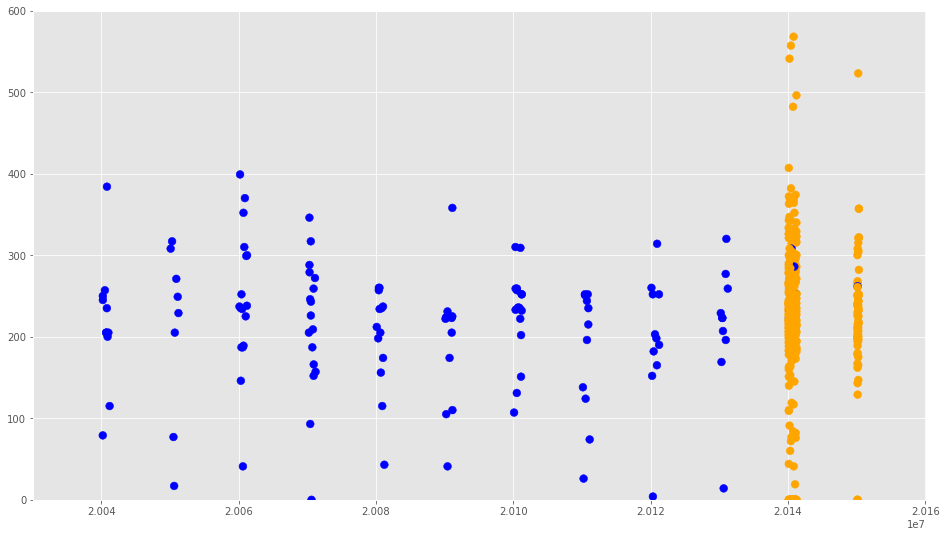

In [15]:
plt.scatter(f1, f2, c=asignar, s=60)
plt.axis([20030101,20160101,0,600])
plt.show()

Sustitución de años 'cero' por None

In [16]:
def edad_fix(anio):
    if anio==0:
        return None
    return anio
 
artists_billboard['anioNacimiento']=artists_billboard.apply(lambda x: edad_fix(x['anioNacimiento']), axis=1);
# la función APPLY modificó la columna 'anioNacimiento' porque ya existía previamente

Calculamos las edades

In [17]:
def calcula_edad(anio,cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio==0.0:
        return None
    return int(momento) - anio
 
artists_billboard['edad_en_billboard']=artists_billboard.apply(lambda x: calcula_edad(x['anioNacimiento'],x['chart_date']), axis=1);
# la función APPLY agregó la columna 'edad_en_billboard' porque NO existía previamente

In [18]:
artists_billboard

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
630,630,The Blower's Daughter,MATT McANDREW,Romantic,Medium Tempo,Pop,Male,20141220,881.0,0,1990.0,24.0
631,631,First Love,JENNIFER LOPEZ,Peaceful,Slow Tempo,Pop,Female,20140705,238.0,0,1970.0,44.0
632,632,No One,ALICIA KEYS,Sophisticated,Slow Tempo,Urban,Female,20071201,157.0,1,1981.0,26.0
633,633,She Came To Give It To You,USHER featuring NICKI MINAJ,Energizing,Medium Tempo,Urban,Mixed,20140913,209.0,0,1982.0,32.0


Asignación de edades aleatorias:

In [19]:
age_avg = artists_billboard['edad_en_billboard'].mean()
age_std = artists_billboard['edad_en_billboard'].std()
age_null_count = artists_billboard['edad_en_billboard'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
 
conValoresNulos = np.isnan(artists_billboard['edad_en_billboard'])
 
artists_billboard.loc[np.isnan(artists_billboard['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list
artists_billboard['edad_en_billboard'] = artists_billboard['edad_en_billboard'].astype(int)
print("Edad Promedio: " + str(age_avg))
print("Desvío Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 30.10282258064516
Desvío Std Edad: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


Mapeo - Segmentación y categorización de los parámetros

In [20]:
# Mood Mapping 
artists_billboard['moodEncoded'] = artists_billboard['mood'].map( {'Energizing': 6, 
                                        'Empowering': 6,
                                        'Cool': 5, 
                                        'Yearning': 4, # anhelo, deseo, ansia
                                        'Excited': 5, #emocionado
                                        'Defiant': 3, 
                                        'Sensual': 2, 
                                        'Gritty': 3, #coraje 
                                        'Sophisticated': 4,
                                        'Aggressive': 4, # provocativo
                                        'Fiery': 4, #caracter fuerte
                                        'Urgent': 3, 
                                        'Rowdy': 4, #ruidoso alboroto
                                        'Sentimental': 4,
                                        'Easygoing': 1, # sencillo
                                        'Melancholy': 4, 
                                        'Romantic': 2, 
                                        'Peaceful': 1, 
                                        'Brooding': 4, # melancolico
                                        'Upbeat': 5, #optimista alegre
                                        'Stirring': 5, #emocionante
                                        'Lively': 5, #animado
                                        'Other': 0,'':0} ).astype(int)
# Tempo Mapping 
artists_billboard['tempoEncoded'] = artists_billboard['tempo'].map( {'Fast Tempo': 0, 'Medium Tempo': 2, 'Slow Tempo': 1, '': 0} ).astype(int)
# Genre Mapping 
artists_billboard['genreEncoded'] = artists_billboard['genre'].map( {'Urban': 4, 
                                          'Pop': 3, 
                                          'Traditional': 2, 
                                          'Alternative & Punk': 1,
                                         'Electronica': 1, 
                                          'Rock': 1, 
                                          'Soundtrack': 0, 
                                          'Jazz': 0,
                                          'Other':0,'':0} 
                                       ).astype(int)
# artist_type Mapping 
artists_billboard['artist_typeEncoded'] = artists_billboard['artist_type'].map( {'Female': 2, 'Male': 3, 'Mixed': 1, '': 0} ).astype(int)
 
# Mapping edad en la que llegaron al billboard
artists_billboard.loc[ artists_billboard['edad_en_billboard'] <= 21, 'edadEncoded']                         = 0
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 21) & (artists_billboard['edad_en_billboard'] <= 26), 'edadEncoded'] = 1
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 26) & (artists_billboard['edad_en_billboard'] <= 30), 'edadEncoded'] = 2
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 30) & (artists_billboard['edad_en_billboard'] <= 40), 'edadEncoded'] = 3
artists_billboard.loc[ artists_billboard['edad_en_billboard'] > 40, 'edadEncoded'] = 4
 
# Mapping Song Duration
artists_billboard.loc[ artists_billboard['durationSeg'] <= 150, 'durationEncoded']                          = 0
artists_billboard.loc[(artists_billboard['durationSeg'] > 150) & (artists_billboard['durationSeg'] <= 180), 'durationEncoded'] = 1
artists_billboard.loc[(artists_billboard['durationSeg'] > 180) & (artists_billboard['durationSeg'] <= 210), 'durationEncoded'] = 2
artists_billboard.loc[(artists_billboard['durationSeg'] > 210) & (artists_billboard['durationSeg'] <= 240), 'durationEncoded'] = 3
artists_billboard.loc[(artists_billboard['durationSeg'] > 240) & (artists_billboard['durationSeg'] <= 270), 'durationEncoded'] = 4
artists_billboard.loc[(artists_billboard['durationSeg'] > 270) & (artists_billboard['durationSeg'] <= 300), 'durationEncoded'] = 5
artists_billboard.loc[ artists_billboard['durationSeg'] > 300, 'durationEncoded'] = 6

Se quitan columnas innecesarias

In [21]:
drop_elements = ['id','title','artist','mood','tempo','genre','artist_type','chart_date','anioNacimiento','durationSeg','edad_en_billboard']
artists_encoded = artists_billboard.drop(drop_elements, axis = 1)

In [22]:
artists_encoded.head()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,4,2,2,3,3.0,2.0
1,0,6,2,3,2,1.0,6.0
2,1,5,2,4,1,0.0,3.0
3,0,4,2,1,3,1.0,2.0
4,0,4,2,2,2,3.0,3.0


Construcción del árbol de decisión

In [23]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(artists_encoded))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(artists_encoded):
        f_train = artists_encoded.loc[train_fold] 
        f_valid = artists_encoded.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['top'], axis=1), 
                               y = f_train["top"]) 
        valid_acc = model.score(X = f_valid.drop(['top'], axis=1), 
                                y = f_valid["top"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.556101
         2          0.556126
         3          0.564038
         4          0.647297
         5          0.608011
         6          0.639286
         7          0.647321


Visualización del árbol de decisiones

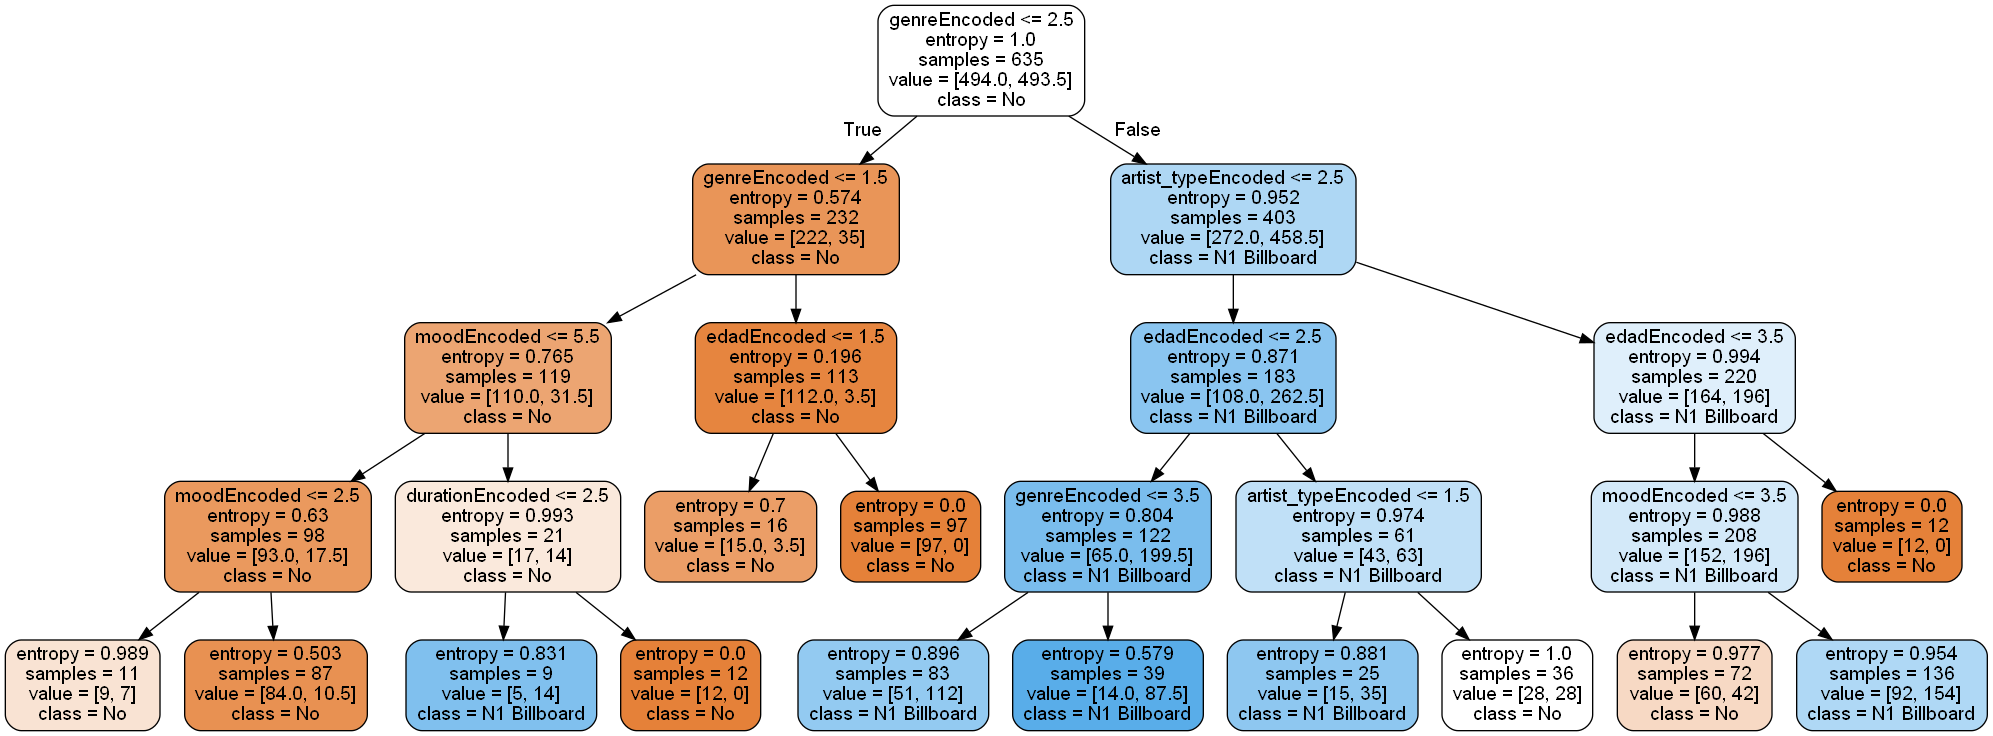

In [24]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = artists_encoded['top']
x_train = artists_encoded.drop(['top'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
# CLASS-WEIGHT rebalancea de 1 a 3,5 por la proporción de TOps 0 y 1 (141 a 494), compensa
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(artists_encoded.drop(['top'], axis=1)),
                              class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

Precisión del árbol

In [25]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

68.03


<b>Corroboramos con otros artistas el grado de precisión del árbol

a) predecir artista CAMILA CABELLO featuring YOUNG THUG;con su canción Havana llego a numero 1 Billboard US en 2017

In [26]:
x_test = pd.DataFrame(columns=('top','moodEncoded', 'tempoEncoded', 'genreEncoded','artist_typeEncoded','edadEncoded','durationEncoded'))

In [27]:
# Datos de Camila Cabello pasados por Encoded. El primer campo indica que fue Top 1, pero el análisis lo omite

x_test.loc[0] = (1,5,2,4,1,0,3)

In [138]:
y_pred = decision_tree.predict(x_test.drop(['top'], axis = 1))
print("Prediccion: " + str(y_pred))

Prediccion: [1]


In [139]:
y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis = 1))
print("Probabilidad de Acierto: " + str(round(y_proba[0,y_pred[0]]* 100, 2))+"%")

Probabilidad de Acierto: 73.98%


b) Predecir artista IMAGINE DRAGONS; con su canción Believer llego al puesto 42 Billboard US en 2017

In [97]:
x_test = pd.DataFrame(columns=('top','moodEncoded', 'tempoEncoded', 'genreEncoded','artist_typeEncoded','edadEncoded','durationEncoded'))

In [98]:
# Datos de Imagine Dragons pasados por Encoded. El primer campo indica que NO fue Top 1, pero el análisis lo omite

x_test.loc[0] = (0,4,2,1,3,2,3)

In [99]:
y_pred = decision_tree.predict(x_test.drop(['top'], axis = 1))
print("Prediccion: " + str(y_pred))

Prediccion: [0]


In [100]:
y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis = 1))
print("Probabilidad de Acierto: " + str(round(y_proba[0,y_pred[0]]* 100, 2))+"%")

Probabilidad de Acierto: 88.89%


Subimos un archivo de prueba

In [101]:
prueba = pd.read_csv('prueba.csv', encoding = "ISO-8859-1")
pruebaok = prueba.drop(['Unnamed: 0'], axis=1)
pruebaok

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,2,2,1,1,2,1
1,0,5,2,4,1,0,3
2,0,2,1,0,2,1,2
3,0,4,0,0,3,2,4
4,0,4,2,1,2,0,1
5,0,2,1,0,1,0,3
6,0,2,1,0,3,0,4
7,0,2,2,0,0,3,6
8,0,0,1,0,1,2,5


In [102]:
pruebaok.shape[0]

9

In [103]:
y_pred = decision_tree.predict(pruebaok.drop(['top'], axis = 1))
print("Prediccion: " + str(y_pred))

Prediccion: [0 1 0 0 0 0 0 0 0]


In [104]:
y_proba = decision_tree.predict_proba(pruebaok.drop(['top'], axis = 1))

In [105]:
pruebaok['top']=y_pred

In [106]:
pruebaok['ProbAc']=0.0
for i in range (pruebaok.shape[0]):
    a = round(y_proba[i,y_pred[i]]*100,2)
    pruebaok.loc[i,'ProbAc']= a
pruebaok

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded,ProbAc
0,0,2,2,1,1,2,1,56.25
1,1,5,2,4,1,0,3,86.21
2,0,2,1,0,2,1,2,56.25
3,0,4,0,0,3,2,4,88.89
4,0,4,2,1,2,0,1,88.89
5,0,2,1,0,1,0,3,56.25
6,0,2,1,0,3,0,4,56.25
7,0,2,2,0,0,3,6,56.25
8,0,0,1,0,1,2,5,56.25


Exportación de los resultados a csv

In [107]:
pruebaok.to_csv('pruebaok.csv')